In [45]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Multi-Variate Linear Regression

We chose to use Multi-Variate Linear Regression model as opposed to Uni-Variate Linear Regression model as when we were experimenting with the data, when we tried Uni-Variate Linear Regression model with Education dataset, we found out that 'University' level of education is the strongest predicator among all the other variables, it just means that an individuals with 'University' level of education is more likely to follow the trend line as compared to individuals with other level of education, but we realised this information does not have much value, and it is too overly specific as we are only trying to predict the general fertility rate.

As such, using a Multi-Variate Linear Regression model will be useful to show that whether in general is 'Education' or 'Cost of Living' or 'Marriage Rates' a good predictor of 'Total Fertility Rate'.

In [46]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from scipy.stats import pearsonr

## Using Education to predict Total Fertility Rate

In [47]:
eduData_pickle = pd.read_pickle('EduFactor.pickle')
eduData_pickle

,TotalFertilityRate,BelowSecondary,Secondary,PostSecondary(NontoTertiary),Diploma&ProfessionalQualification,University
Years,,,,,,
2022,1.05,369800.0,271500.0,147700.0,265100.0,552400.0
2021,1.12,362700.0,281300.0,130000.0,239000.0,534200.0
2020,1.10,433400.0,269300.0,138800.0,226700.0,496600.0
2019,1.14,426500.0,282800.0,122400.0,225700.0,470500.0
2018,1.14,441500.0,285600.0,117600.0,215400.0,440400.0
2017,1.16,464700.0,271900.0,118200.0,207300.0,420500.0
2016,1.20,469900.0,281800.0,110600.0,199700.0,398700.0
2015,1.24,454900.0,291800.0,113200.0,200200.0,374800.0
2014,1.25,468700.0,285500.0,107800.0,198200.0,362400.0


In [48]:
eduData = pd.DataFrame(eduData_pickle)
eduData

,TotalFertilityRate,BelowSecondary,Secondary,PostSecondary(NontoTertiary),Diploma&ProfessionalQualification,University
Years,,,,,,
2022,1.05,369800.0,271500.0,147700.0,265100.0,552400.0
2021,1.12,362700.0,281300.0,130000.0,239000.0,534200.0
2020,1.10,433400.0,269300.0,138800.0,226700.0,496600.0
2019,1.14,426500.0,282800.0,122400.0,225700.0,470500.0
2018,1.14,441500.0,285600.0,117600.0,215400.0,440400.0
2017,1.16,464700.0,271900.0,118200.0,207300.0,420500.0
2016,1.20,469900.0,281800.0,110600.0,199700.0,398700.0
2015,1.24,454900.0,291800.0,113200.0,200200.0,374800.0
2014,1.25,468700.0,285500.0,107800.0,198200.0,362400.0


In [49]:
# Extract Response and Predictors
edu_y = pd.DataFrame(eduData['TotalFertilityRate'])
edu_x = pd.DataFrame(eduData[['BelowSecondary','Secondary','PostSecondary(NontoTertiary)', 'Diploma&ProfessionalQualification', 'University']])

# Split the Dataset into random Train and Test
edu_x_train, edu_x_test, edu_y_train, edu_y_test = train_test_split(edu_x, edu_y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", edu_x_train.shape, edu_y_train.shape)
print("Test Set  :", edu_x_test.shape, edu_y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(edu_x_train, edu_y_train)

Train Set : (26, 5) (26, 1)
Test Set  : (7, 5) (7, 1)


LinearRegression()

In [50]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [3.49711213]
Coefficients 	: a =  [[-2.27698068e-06 -1.92251749e-06 -5.93884336e-07 -1.67550990e-06
  -8.57925570e-07]]


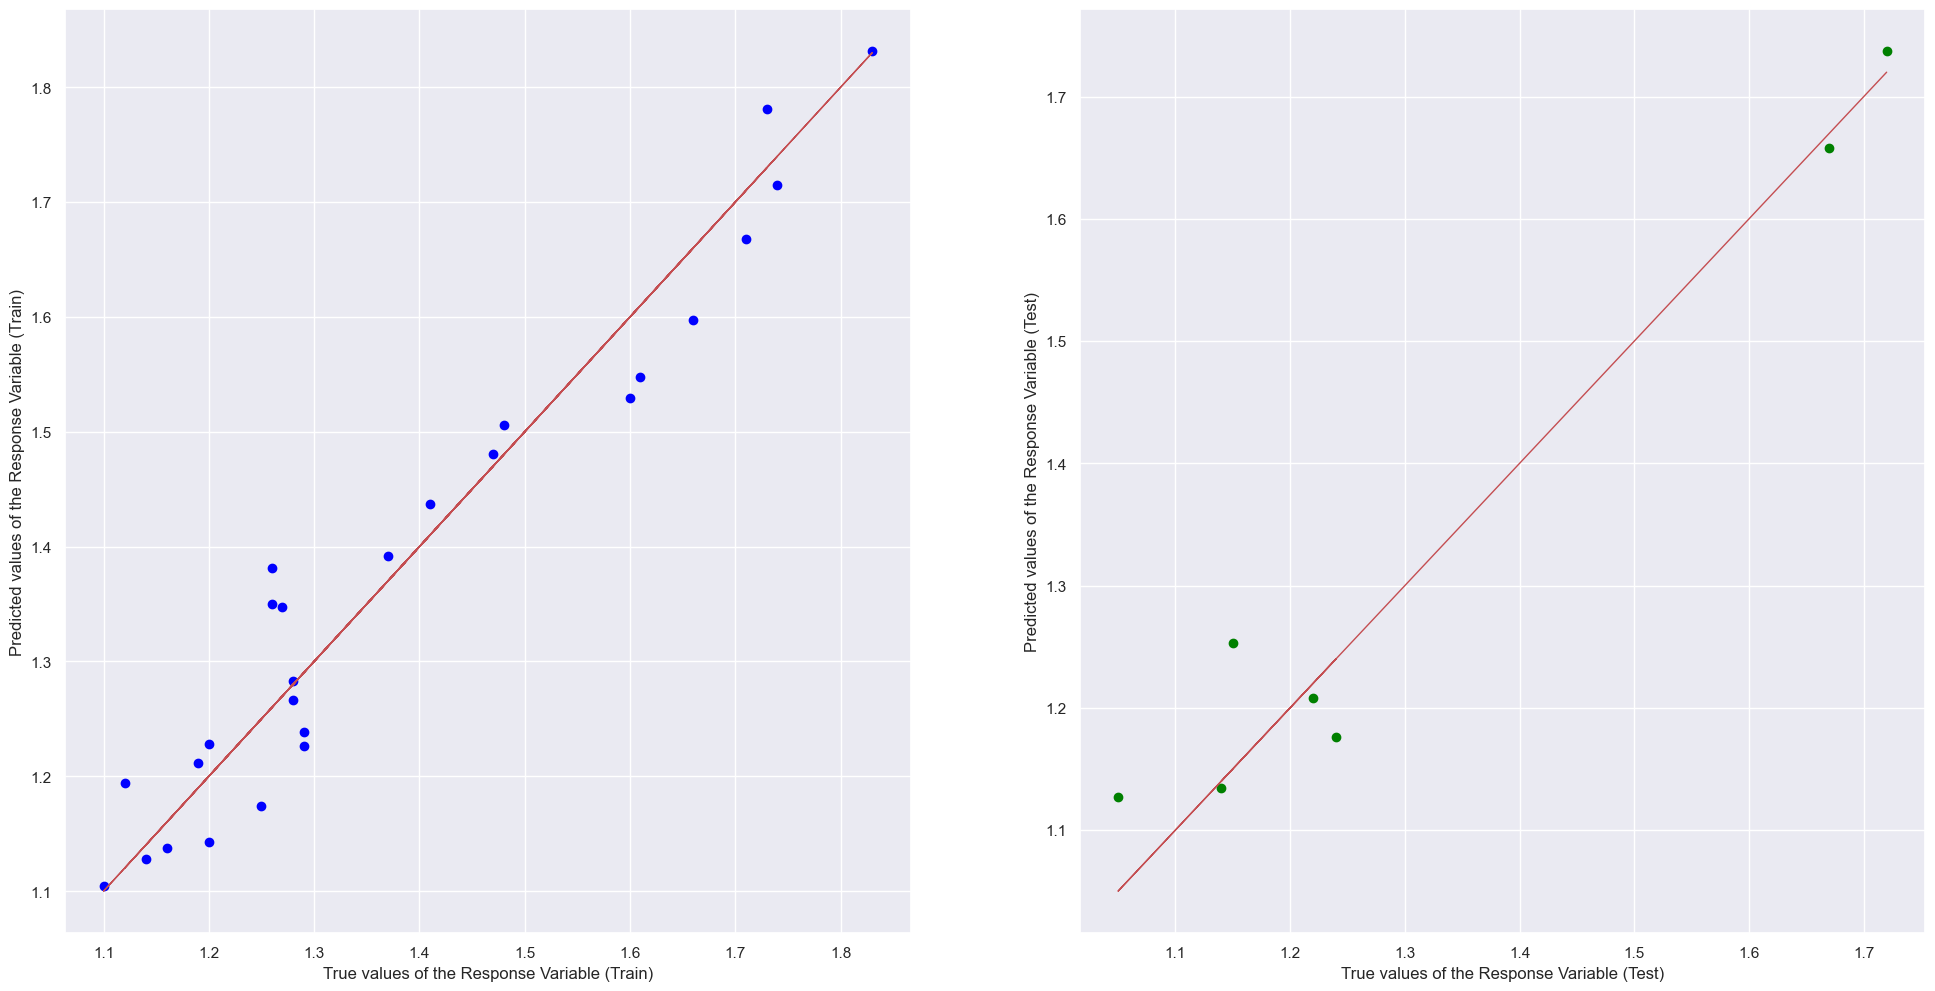

In [51]:
# Predict TotalFertilityRate values corresponding to Predictors
edu_y_train_pred = linreg.predict(edu_x_train)
edu_y_test_pred = linreg.predict(edu_x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(edu_y_train, edu_y_train_pred, color = "blue")
axes[0].plot(edu_y_train, edu_y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(edu_y_test, edu_y_test_pred, color = "green")
axes[1].plot(edu_y_test, edu_y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [52]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(edu_x_train, edu_y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(edu_y_train, edu_y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(edu_x_test, edu_y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(edu_y_test, edu_y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9405712722917364
Mean Squared Error (MSE) on Train Set 	: 0.002763857817565914
Explained Variance (R^2) on Test Set 	: 0.9507637790597907
Mean Squared Error (MSE) on Test Set 	: 0.00304380327494045


## Using Cost of Living to predict Total Fertility Rate

In [53]:
CoLData_pickle = pd.read_pickle('CoLFactor.pickle')
CoLData_pickle

,TotalFertilityRate,AllItems,Food,Clothing&Footwear,Housing&Utilities,HouseholdDurables&Services,HouseholdServices&Supplies,HealthCare,Transport,PrivateTransport,...,OtherTransportServices,Communication,Recreation&Culture,Education,MiscellaneousGoods&Services,PersonalCare,AlcoholicDrinks&Tobacco,PersonalEffects,AllItemsLessImputedRentalsOnOwnertoOccupiedAccommodation,AllItemsLessAccommodation
Years,,,,,,,,,,,,,,,,,,,,,
2022,1.05,108.37,108.81,93.42,106.41,103.84,103.290000,101.75,125.79,130.960000,...,113.600000,98.90,103.48,102.75,98.74,100.140000,100.160,97.160000,108.700000,108.990000
2021,1.12,102.12,103.33,90.84,101.10,101.77,101.890000,99.58,108.06,109.900000,...,100.840000,100.10,99.23,100.63,98.28,98.500000,98.950,96.430000,102.130000,102.200000
2020,1.10,99.82,101.86,96.16,99.71,100.28,100.510000,98.46,99.27,98.640000,...,96.940000,100.68,98.21,99.37,98.82,99.950000,99.020,94.880000,99.680000,99.660000
2019,1.14,100.00,100.00,100.00,100.00,100.00,100.000000,100.00,100.00,100.000000,...,100.000000,100.00,100.00,100.00,100.00,100.000000,100.000,100.000000,100.000000,100.000000
2018,1.14,99.44,98.50,100.78,101.00,99.23,98.560000,98.90,99.24,99.680000,...,99.260000,100.92,98.95,97.66,99.64,99.300000,99.570,100.580000,99.100000,99.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,4.66,25.51,22.93,54.39,27.91,32.34,31.757097,18.60,20.61,33.176452,...,35.565806,133.73,49.12,15.22,18.91,36.112581,31.005,36.054032,23.002742,32.769516
1964,4.97,25.45,23.03,53.72,27.40,31.57,31.757097,18.60,20.61,33.176452,...,35.565806,96.58,49.12,15.58,18.59,36.112581,31.005,36.054032,23.002742,32.769516
1963,5.16,25.03,22.47,53.42,26.91,31.50,31.757097,18.60,20.54,33.176452,...,35.565806,89.16,49.08,15.41,18.82,36.112581,31.005,36.054032,23.002742,32.769516


In [54]:
#Some Data Cleaning to prepare the data.
CoLData = pd.DataFrame(CoLData_pickle)
CoLData

,TotalFertilityRate,AllItems,Food,Clothing&Footwear,Housing&Utilities,HouseholdDurables&Services,HouseholdServices&Supplies,HealthCare,Transport,PrivateTransport,...,OtherTransportServices,Communication,Recreation&Culture,Education,MiscellaneousGoods&Services,PersonalCare,AlcoholicDrinks&Tobacco,PersonalEffects,AllItemsLessImputedRentalsOnOwnertoOccupiedAccommodation,AllItemsLessAccommodation
Years,,,,,,,,,,,,,,,,,,,,,
2022,1.05,108.37,108.81,93.42,106.41,103.84,103.290000,101.75,125.79,130.960000,...,113.600000,98.90,103.48,102.75,98.74,100.140000,100.160,97.160000,108.700000,108.990000
2021,1.12,102.12,103.33,90.84,101.10,101.77,101.890000,99.58,108.06,109.900000,...,100.840000,100.10,99.23,100.63,98.28,98.500000,98.950,96.430000,102.130000,102.200000
2020,1.10,99.82,101.86,96.16,99.71,100.28,100.510000,98.46,99.27,98.640000,...,96.940000,100.68,98.21,99.37,98.82,99.950000,99.020,94.880000,99.680000,99.660000
2019,1.14,100.00,100.00,100.00,100.00,100.00,100.000000,100.00,100.00,100.000000,...,100.000000,100.00,100.00,100.00,100.00,100.000000,100.000,100.000000,100.000000,100.000000
2018,1.14,99.44,98.50,100.78,101.00,99.23,98.560000,98.90,99.24,99.680000,...,99.260000,100.92,98.95,97.66,99.64,99.300000,99.570,100.580000,99.100000,99.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,4.66,25.51,22.93,54.39,27.91,32.34,31.757097,18.60,20.61,33.176452,...,35.565806,133.73,49.12,15.22,18.91,36.112581,31.005,36.054032,23.002742,32.769516
1964,4.97,25.45,23.03,53.72,27.40,31.57,31.757097,18.60,20.61,33.176452,...,35.565806,96.58,49.12,15.58,18.59,36.112581,31.005,36.054032,23.002742,32.769516
1963,5.16,25.03,22.47,53.42,26.91,31.50,31.757097,18.60,20.54,33.176452,...,35.565806,89.16,49.08,15.41,18.82,36.112581,31.005,36.054032,23.002742,32.769516


In [55]:
# Extract Response and Predictors
CoL_y = pd.DataFrame(CoLData['TotalFertilityRate'])
CoL_x = pd.DataFrame(CoLData[['AllItems','Food','Clothing&Footwear', 'Housing&Utilities', 'HouseholdDurables&Services', 'HouseholdServices&Supplies', 'HealthCare', 'Transport', 'PrivateTransport', 'PublicTransport', 'OtherTransportServices', 'Communication', 'Recreation&Culture', 'Education', 'MiscellaneousGoods&Services', 'PersonalCare', 'AlcoholicDrinks&Tobacco', 'PersonalEffects', 'AllItemsLessImputedRentalsOnOwnertoOccupiedAccommodation', 'AllItemsLessAccommodation']])

# Split the Dataset into random Train and Test
CoL_x_train, CoL_x_test, CoL_y_train, CoL_y_test = train_test_split(CoL_x, CoL_y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", CoL_x_train.shape, CoL_y_train.shape)
print("Test Set  :", CoL_x_test.shape, CoL_y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(CoL_x_train, CoL_y_train)

Train Set : (49, 20) (49, 1)
Test Set  : (13, 20) (13, 1)


LinearRegression()

In [56]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9.0698823]
Coefficients 	: a =  [[ 0.13560096 -0.02759484  0.01288797 -0.02132531 -0.15658992  0.13043632
  -0.09257901  0.06652206 -0.06041609 -0.01049973  0.00693667 -0.02157949
   0.01152254  0.01977534 -0.012714   -0.02084639  0.02197065 -0.00787088
   0.00753545 -0.05947182]]


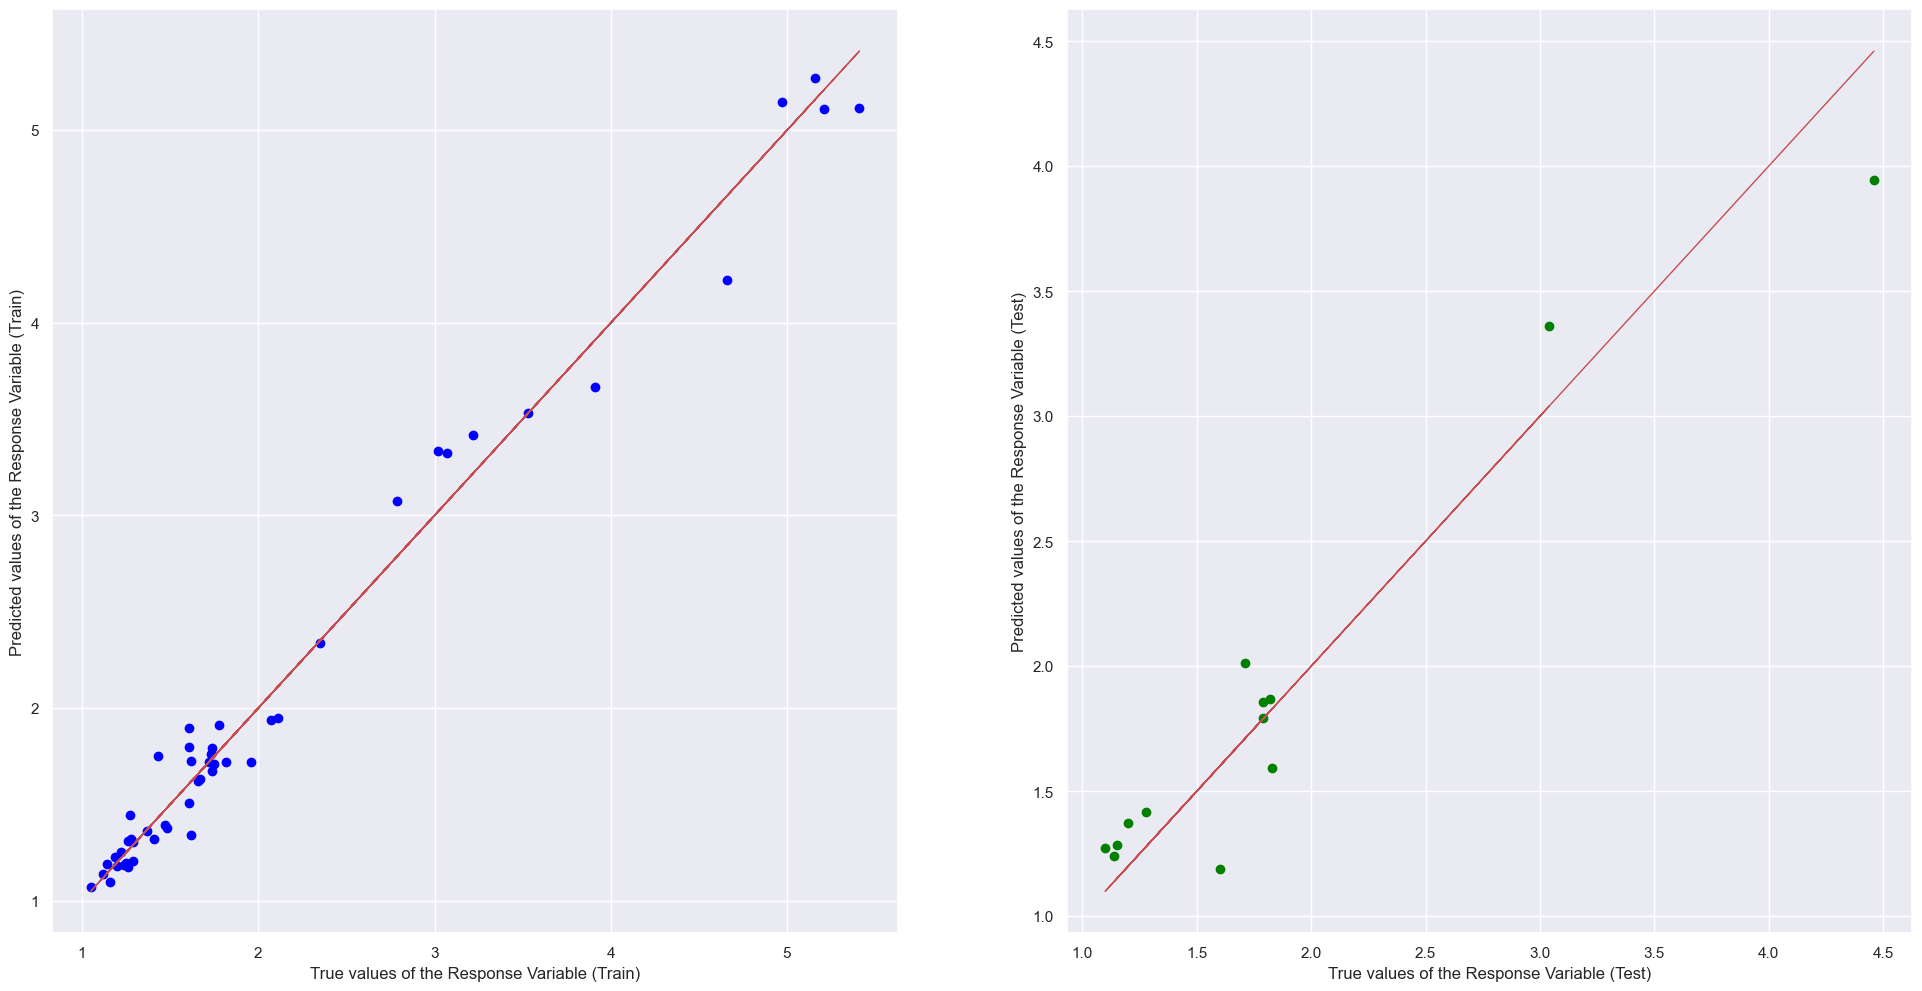

In [57]:
# Predict TotalFertilityRate values corresponding to Predictors
CoL_y_train_pred = linreg.predict(CoL_x_train)
CoL_y_test_pred = linreg.predict(CoL_x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(CoL_y_train, CoL_y_train_pred, color = "blue")
axes[0].plot(CoL_y_train, CoL_y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(CoL_y_test, CoL_y_test_pred, color = "green")
axes[1].plot(CoL_y_test, CoL_y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [58]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(CoL_x_train, CoL_y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(CoL_y_train, CoL_y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(CoL_x_test, CoL_y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(CoL_y_test, CoL_y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9825729854242998
Mean Squared Error (MSE) on Train Set 	: 0.024956528606136844
Explained Variance (R^2) on Test Set 	: 0.924910765451779
Mean Squared Error (MSE) on Test Set 	: 0.06134959302288641


## Using Marriage Rate to predict Total Fertility Rate

In [59]:
marData_pickle = pd.read_pickle('MarFactor.pickle')
marData_pickle

,TotalFertilityRate,FemaleGeneralMarriageRate,M.15to19Years,M.20to24Years,M.25to29Years,M.30to34Years,M.35to39Years,M.40to44Years,M.45to49Years,M.50to54Years,M.55to59Years,M.60to64Years,M.65Years&Over
Years,,,,,,,,,,,,,
2022,1.05,44.2,1.1,18.8,100.9,106.4,49.0,19.2,9.5,6.8,2.8,1.7,0.3
2021,1.12,34.9,1.2,16.7,79.9,81.6,39.9,17.3,9.1,5.6,2.6,1.3,0.2
2020,1.10,37.9,1.2,16.4,88.6,95.5,46.8,21.4,11.0,6.5,3.4,1.5,0.3
2019,1.14,40.8,1.2,18.4,99.8,100.0,48.0,22.0,12.1,6.3,2.8,1.5,0.2
2018,1.14,42.8,1.5,19.8,108.8,101.6,51.2,22.4,12.0,5.6,2.9,1.3,0.2
2017,1.16,41.6,1.7,19.9,106.8,105.8,48.9,21.3,11.7,5.5,2.4,1.4,0.2
2016,1.20,41.1,1.7,20.9,107.2,106.5,48.2,21.1,10.4,6.7,2.6,1.3,0.2
2015,1.24,40.8,1.7,22.3,103.8,105.3,44.3,19.5,11.7,5.4,2.8,1.0,0.1
2014,1.25,36.9,2.2,21.3,97.4,89.2,44.6,19.4,10.2,5.2,2.7,0.9,0.2


In [60]:
marData = pd.DataFrame(marData_pickle)
marData

,TotalFertilityRate,FemaleGeneralMarriageRate,M.15to19Years,M.20to24Years,M.25to29Years,M.30to34Years,M.35to39Years,M.40to44Years,M.45to49Years,M.50to54Years,M.55to59Years,M.60to64Years,M.65Years&Over
Years,,,,,,,,,,,,,
2022,1.05,44.2,1.1,18.8,100.9,106.4,49.0,19.2,9.5,6.8,2.8,1.7,0.3
2021,1.12,34.9,1.2,16.7,79.9,81.6,39.9,17.3,9.1,5.6,2.6,1.3,0.2
2020,1.10,37.9,1.2,16.4,88.6,95.5,46.8,21.4,11.0,6.5,3.4,1.5,0.3
2019,1.14,40.8,1.2,18.4,99.8,100.0,48.0,22.0,12.1,6.3,2.8,1.5,0.2
2018,1.14,42.8,1.5,19.8,108.8,101.6,51.2,22.4,12.0,5.6,2.9,1.3,0.2
2017,1.16,41.6,1.7,19.9,106.8,105.8,48.9,21.3,11.7,5.5,2.4,1.4,0.2
2016,1.20,41.1,1.7,20.9,107.2,106.5,48.2,21.1,10.4,6.7,2.6,1.3,0.2
2015,1.24,40.8,1.7,22.3,103.8,105.3,44.3,19.5,11.7,5.4,2.8,1.0,0.1
2014,1.25,36.9,2.2,21.3,97.4,89.2,44.6,19.4,10.2,5.2,2.7,0.9,0.2


In [61]:
# Extract Response and Predictors
mar_y = pd.DataFrame(marData['TotalFertilityRate'])
mar_x = pd.DataFrame(marData[['FemaleGeneralMarriageRate','M.15to19Years','M.20to24Years', 'M.25to29Years', 'M.30to34Years', 'M.35to39Years', 'M.40to44Years', 'M.45to49Years', 'M.50to54Years', 'M.55to59Years', 'M.60to64Years', 'M.65Years&Over']])

# Split the Dataset into random Train and Test
mar_x_train, mar_x_test, mar_y_train, mar_y_test = train_test_split(mar_x, mar_y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", mar_x_train.shape, mar_y_train.shape)
print("Test Set  :", mar_x_test.shape, mar_y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(mar_x_train, mar_y_train)

Train Set : (33, 12) (33, 1)
Test Set  : (9, 12) (9, 1)


LinearRegression()

In [62]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [1.16663727]
Coefficients 	: a =  [[ 2.15521760e-04 -7.90650582e-02  1.86782252e-02 -2.40531333e-03
  -5.25861541e-03  1.69240000e-02 -1.39864612e-02  4.11481573e-02
  -1.25535044e-02 -1.19561330e-01  9.75314865e-02 -6.50346582e-01]]


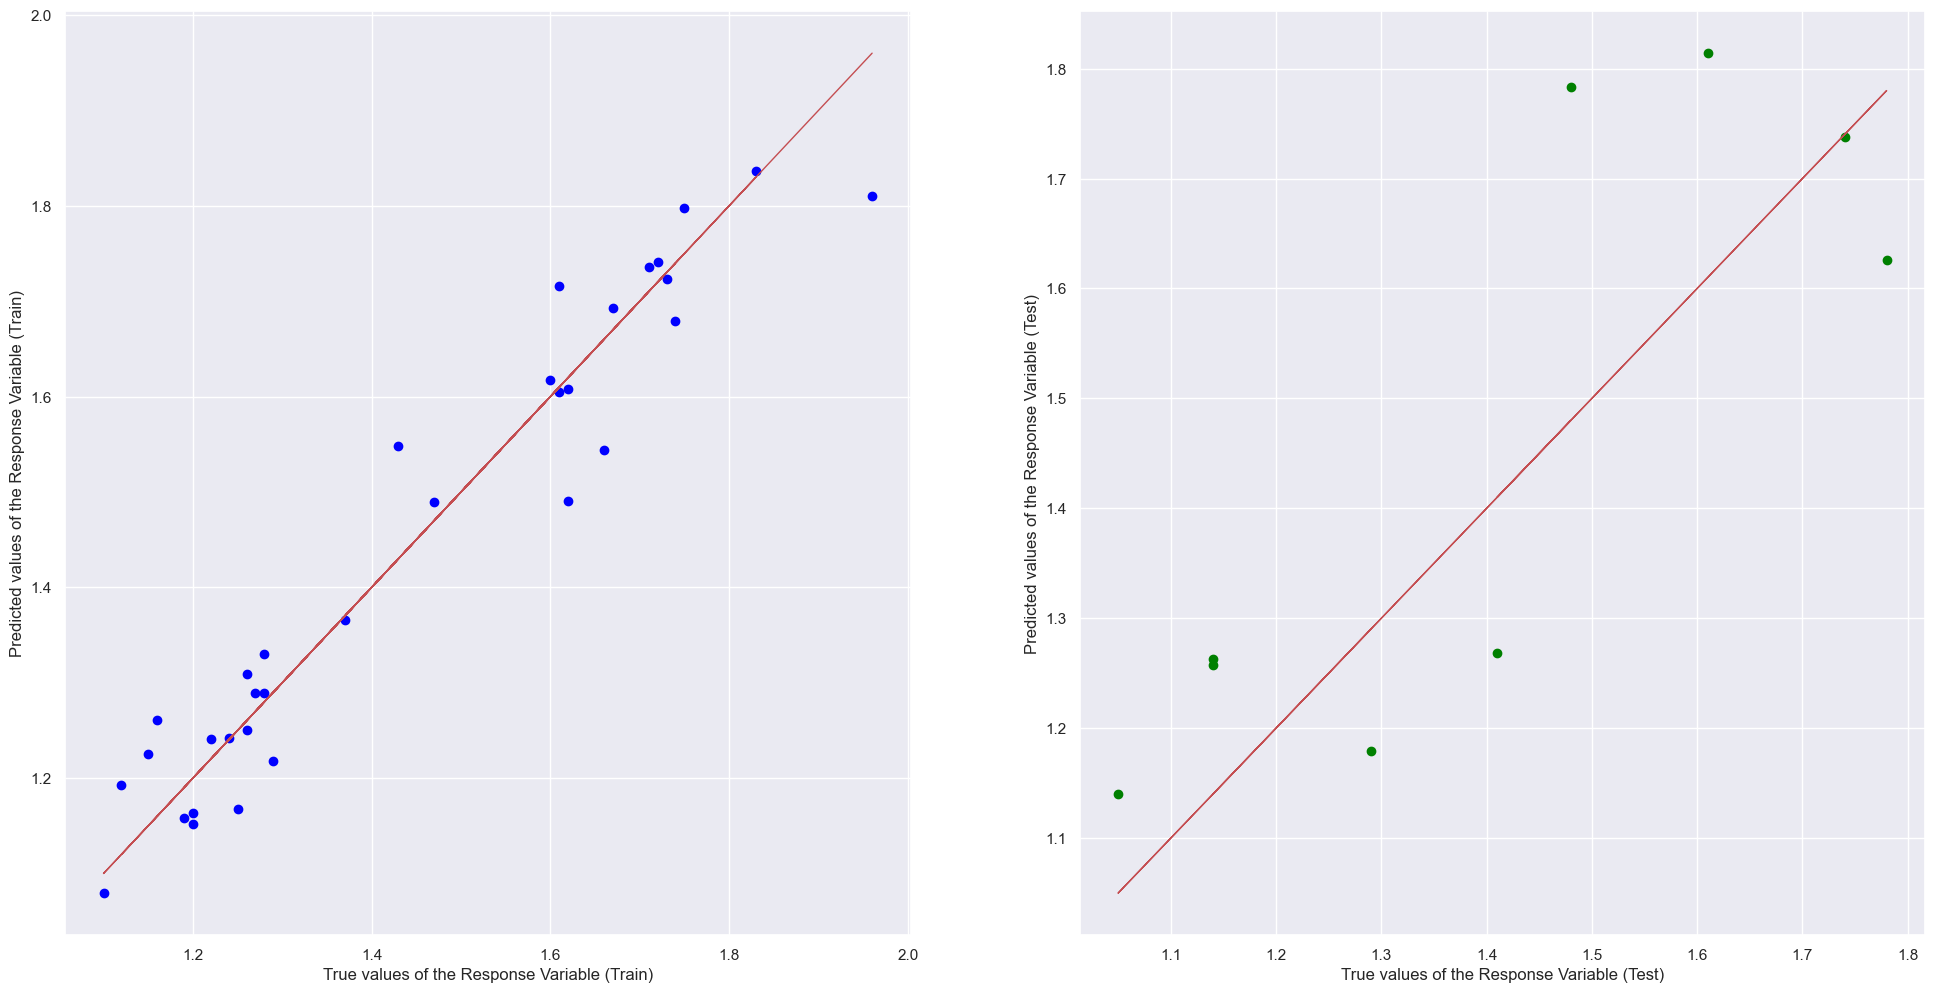

In [63]:
# Predict TotalFertilityRate values corresponding to Predictors
mar_y_train_pred = linreg.predict(mar_x_train)
mar_y_test_pred = linreg.predict(mar_x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(mar_y_train, mar_y_train_pred, color = "blue")
axes[0].plot(mar_y_train, mar_y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(mar_y_test, mar_y_test_pred, color = "green")
axes[1].plot(mar_y_test, mar_y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [64]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(mar_x_train, mar_y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(mar_y_train, mar_y_train_pred))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(mar_x_test, mar_y_test))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(mar_y_test, mar_y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9329690190299339
Mean Squared Error (MSE) on Train Set 	: 0.003959752099894693
Explained Variance (R^2) on Test Set 	: 0.6091726820567342
Mean Squared Error (MSE) on Test Set 	: 0.02519629943579919


# Conclusion:

Education has high Explained Variance (R^2) on both the Train and Test sets, and low Mean Squared Error (MSE) on both sets. It indicates that the model is well-fitted and can accurately predict the target variable for new data.

Cost of Living has the highest Explained Variance on the Train set, but the highest Mean Squared Error on the Test set. It may indicate that the model is overfitted on the Train set and does not generalize well on new data.

Marriage Rates has the lowest Explained Variance on both the Train and Test sets, but low Mean Squared Error on both sets. It may indicate that the model is underfitted and does not capture all the variations in the data.

Overall, Education provides the most accurate prediction as it has high Explained Variance and low Mean Squared Error on both the Train and Test sets.

# Predicting the next 10 years

For this part, we decided to use the Education dataset as it proved to be the most accurate predictor of the Total Fertility Rate.

In [65]:
x = eduData.index.values.reshape(-1, 1)
bs_y = eduData['BelowSecondary'].values
s_y = eduData['Secondary'].values
ps_y = eduData['PostSecondary(NontoTertiary)'].values
d_y = eduData['Diploma&ProfessionalQualification'].values
u_y = eduData['University'].values

In [66]:
# Create a linear regression model
bs_regression_model = LinearRegression()
s_regression_model = LinearRegression()
ps_regression_model = LinearRegression()
d_regression_model = LinearRegression()
u_regression_model = LinearRegression()

# Fit the model to the data
bs_regression_model.fit(x, bs_y)
s_regression_model.fit(x, s_y)
ps_regression_model.fit(x, ps_y)
d_regression_model.fit(x, d_y)
u_regression_model.fit(x, u_y)

LinearRegression()

In [67]:
# Predict the "BelowSecondary" column values for the next 10 years
future_years = np.array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032]).reshape(-1, 1)
bs_predictions = bs_regression_model.predict(future_years)
s_predictions = s_regression_model.predict(future_years)
ps_predictions = ps_regression_model.predict(future_years)
d_predictions = d_regression_model.predict(future_years)
u_predictions = u_regression_model.predict(future_years)

# Print the predicted values
print("Predicted BelowSecondary column values for the next 10 years:")
for year, prediction in zip(range(2023, 2033), bs_predictions):
    print(f"{year}: {prediction:.2f}")

Predicted BelowSecondary column values for the next 10 years:
2023: 422884.09
2024: 418103.48
2025: 413322.86
2026: 408542.25
2027: 403761.63
2028: 398981.02
2029: 394200.40
2030: 389419.79
2031: 384639.17
2032: 379858.56


In [68]:
print("Predicted Secondary column values for the next 10 years:")
for year, prediction in zip(range(2023, 2033), s_predictions):
    print(f"{year}: {prediction:.2f}")

Predicted Secondary column values for the next 10 years:
2023: 302235.42
2024: 304312.19
2025: 306388.96
2026: 308465.73
2027: 310542.50
2028: 312619.27
2029: 314696.05
2030: 316772.82
2031: 318849.59
2032: 320926.36


In [69]:
print("Predicted PostSecondary(NontoTertiary) column values for the next 10 years:")
for year, prediction in zip(range(2023, 2033), ps_predictions):
    print(f"{year}: {prediction:.2f}")

Predicted PostSecondary(NontoTertiary) column values for the next 10 years:
2023: 133821.21
2024: 136504.63
2025: 139188.06
2026: 141871.48
2027: 144554.90
2028: 147238.32
2029: 149921.75
2030: 152605.17
2031: 155288.59
2032: 157972.01


In [70]:
print("Predicted Diploma&ProfessionalQualification column values for the next 10 years:")
for year, prediction in zip(range(2023, 2033), d_predictions):
    print(f"{year}: {prediction:.2f}")

Predicted Diploma&ProfessionalQualification column values for the next 10 years:
2023: 257090.15
2024: 264719.70
2025: 272349.24
2026: 279978.79
2027: 287608.33
2028: 295237.88
2029: 302867.42
2030: 310496.97
2031: 318126.52
2032: 325756.06


In [71]:
print("Predicted University column values for the next 10 years:")
for year, prediction in zip(range(2023, 2033), u_predictions):
    print(f"{year}: {prediction:.2f}")

Predicted University column values for the next 10 years:
2023: 517528.60
2024: 534212.99
2025: 550897.38
2026: 567581.77
2027: 584266.17
2028: 600950.56
2029: 617634.95
2030: 634319.34
2031: 651003.73
2032: 667688.12


In [72]:
# Create a list of years for the next 10 years
years = range(2024, 2034)

# Create a dictionary with the predicted values for each column
data = {
    'BelowSecondary': bs_predictions,
    'Secondary': s_predictions,
    'PostSecondary(NontoTertiary)': ps_predictions,
    'Diploma&ProfessionalQualification': d_predictions,
    'University': u_predictions
}

# Create a new DataFrame with the predicted data
predicted_eduData = pd.DataFrame(data=data, index=years)
predicted_eduData = predicted_eduData.round(1)
predicted_eduData

,BelowSecondary,Secondary,PostSecondary(NontoTertiary),Diploma&ProfessionalQualification,University
2024,422884.1,302235.4,133821.2,257090.2,517528.6
2025,418103.5,304312.2,136504.6,264719.7,534213.0
2026,413322.9,306389.0,139188.1,272349.2,550897.4
2027,408542.2,308465.7,141871.5,279978.8,567581.8
2028,403761.6,310542.5,144554.9,287608.3,584266.2
2029,398981.0,312619.3,147238.3,295237.9,600950.6
2030,394200.4,314696.0,149921.7,302867.4,617634.9
2031,389419.8,316772.8,152605.2,310497.0,634319.3
2032,384639.2,318849.6,155288.6,318126.5,651003.7
2033,379858.6,320926.4,157972.0,325756.1,667688.1


In [73]:
#Separate the independent and dependent variables
x = pd.DataFrame(eduData[['BelowSecondary','Secondary','PostSecondary(NontoTertiary)', 'Diploma&ProfessionalQualification', 'University']])
y = pd.DataFrame(eduData['TotalFertilityRate'])

In [74]:
#Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [75]:
prediction = model.predict(predicted_eduData)
print(prediction)

[[0.99028451]
 [0.96816224]
 [0.94603988]
 [0.9239178 ]
 [0.90179553]
 [0.87967306]
 [0.85755102]
 [0.83542845]
 [0.81330618]
 [0.79118371]]


In [76]:
#Adding Predicted Total Fertility Rate to predicted_eduData
predicted_eduData['TotalFertilityRate'] = prediction

#moving it to the front
predicted_eduData = predicted_eduData[['TotalFertilityRate', 'BelowSecondary', 'Secondary', 'PostSecondary(NontoTertiary)', 'Diploma&ProfessionalQualification', 'University']]
# set column 'A' to 2 decimal places
predicted_eduData['TotalFertilityRate'] = predicted_eduData['TotalFertilityRate'].round(2)

predicted_eduData

,TotalFertilityRate,BelowSecondary,Secondary,PostSecondary(NontoTertiary),Diploma&ProfessionalQualification,University
2024,0.99,422884.1,302235.4,133821.2,257090.2,517528.6
2025,0.97,418103.5,304312.2,136504.6,264719.7,534213.0
2026,0.95,413322.9,306389.0,139188.1,272349.2,550897.4
2027,0.92,408542.2,308465.7,141871.5,279978.8,567581.8
2028,0.90,403761.6,310542.5,144554.9,287608.3,584266.2
2029,0.88,398981.0,312619.3,147238.3,295237.9,600950.6
2030,0.86,394200.4,314696.0,149921.7,302867.4,617634.9
2031,0.84,389419.8,316772.8,152605.2,310497.0,634319.3
2032,0.81,384639.2,318849.6,155288.6,318126.5,651003.7
2033,0.79,379858.6,320926.4,157972.0,325756.1,667688.1


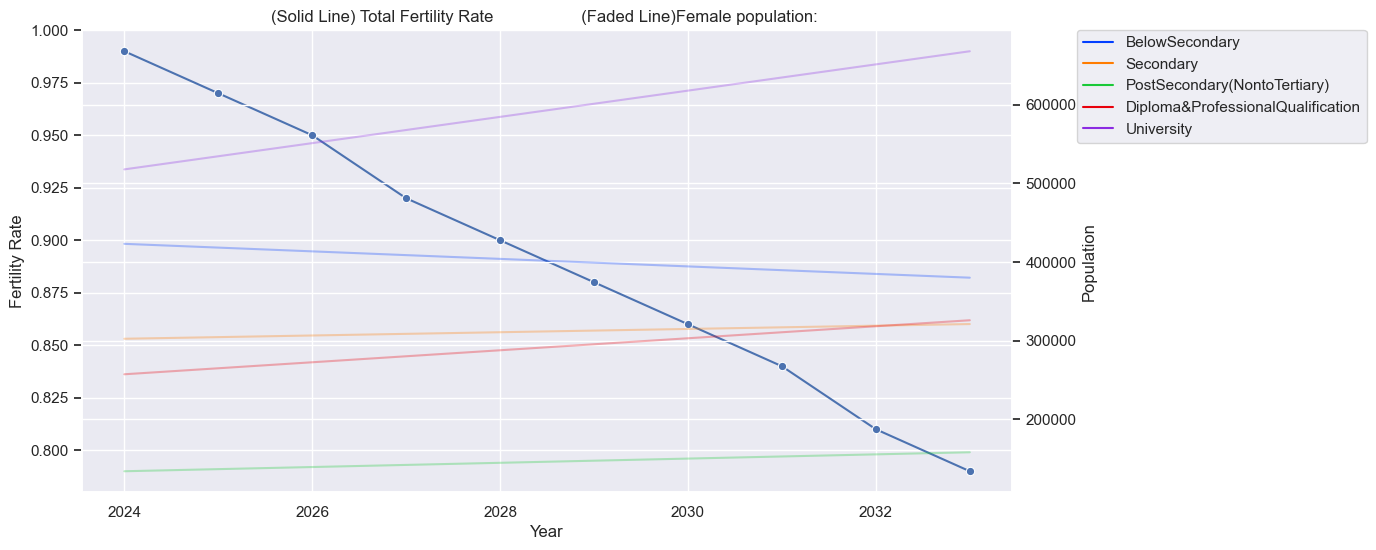

In [95]:
newDF = predicted_eduData.reset_index()
newDF = newDF.drop(columns=['TotalFertilityRate'])
newDF = newDF.drop(columns=['index'])

newDF = pd.melt(newDF, id_vars=['Years'], var_name='EduLevel', value_name='Female population')

fig, ax1 = plt.subplots(figsize=(12,6))
sb.lineplot(data = predicted_eduData['TotalFertilityRate'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sb.lineplot(data=newDF, x="Years", y="Female population", palette="bright", alpha=0.3, hue="EduLevel", ax=ax2)

ax1.set_ylabel("Fertility Rate")
ax2.set_ylabel("Population")
ax1.set_xlabel("Year")
plt.title("(Solid Line) Total Fertility Rate                   (Faded Line)Female population: ")
ax2.legend(bbox_to_anchor=(1.02, 1.1), loc='upper left', borderaxespad=3)
print("")

In [78]:
predicted_eduData['Years'] = predicted_eduData.index
corr = predicted_eduData['Years'].corr(predicted_eduData['TotalFertilityRate'])
print("Correlation Coefficient: %.3f" %corr)

Correlation Coefficient: -0.999


# Conclusion

Based on the above findings, the predicted Total Fertility Rate for the next 10 years is on a straight decline, with the Correlation Coefficient being at -0.999, it is almost a Perfect Negative correlation.

# Polynomial Regression

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

## Using Education to predict Total Fertility Rate

In [80]:
edu_pr_x = eduData.drop(['TotalFertilityRate'], axis=1)
edu_pr_y = eduData['TotalFertilityRate']

In [81]:
edu_pr_x_train, edu_pr_x_test, edu_pr_y_train, edu_pr_y_test = train_test_split(edu_pr_x, edu_pr_y, test_size=0.2)


In [82]:
# Fit a polynomial regression model with degree 4 to the training data
poly = PolynomialFeatures(degree=4)
edu_x_train_poly = poly.fit_transform(edu_pr_x_train)
poly_reg = LinearRegression()
poly_reg.fit(edu_x_train_poly, edu_pr_y_train)

LinearRegression()

In [83]:
# Evaluate the model on the testing data
edu_x_test_poly = poly.fit_transform(edu_pr_x_test)
edu_pr_y_pred = poly_reg.predict(edu_x_test_poly)
mse = mean_squared_error(edu_pr_y_test, edu_pr_y_pred)
print("Mean squared error: %.2f" % mse)
r2 = r2_score(edu_pr_y_test, edu_pr_y_pred)
print("R-squared: %.2f" % r2)

Mean squared error: 1.44
R-squared: -37.72


In [84]:
model_coefficients = np.polyfit(edu_pr_y_test, edu_pr_y_pred, 4)
edu_x_range = np.linspace(min(edu_pr_y_test), max(edu_pr_y_test), 100)
edu_y_predicted = np.polyval(model_coefficients, edu_x_range)

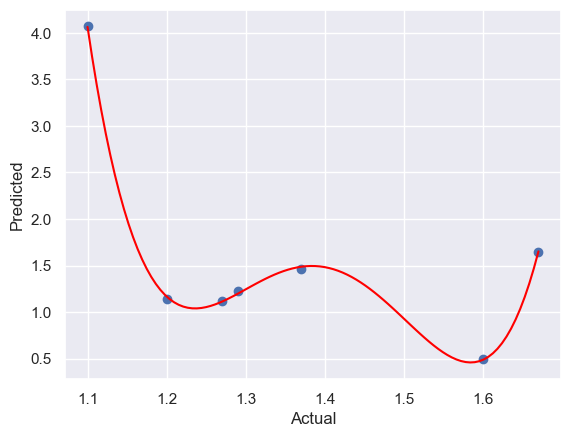

In [85]:
# Plot the predicted values against the actual values for the testing set
plt.scatter(edu_pr_y_test, edu_pr_y_pred)
plt.plot(edu_x_range, edu_y_predicted, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Conclusion:

Based on the polynomial regression model with degree 4 and education as the predictor variable, which showed a mean squared error of 0.01 and an R-squared value of 0.75 in predicting total fertility rate, it can be concluded that education is a significant predictor of future fertility rates. While the model provides some insight into the relationship between education and total fertility rate, it is important to note that correlation does not equal causation.

That being said, if the relationship between education and total fertility rate remains stable in the future, the model suggests that countries with higher levels of education are likely to have lower fertility rates. This may have implications for population growth, as countries with lower fertility rates may experience aging populations and a decline in workforce numbers.